In [347]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("Resources/Mouse_metadata.csv")
study_results = pd.read_csv("Resources/Study_results.csv")

# Combine the data into a single dataset
combinedmouse = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
combinedmouse
# Display the data table for preview
combinedmouse.to_csv("Resources/combinedmouse.csv")


In [348]:
# Checking the number of mice.
nmice = len(set(combinedmouse["Mouse ID"]))
nmice

249

In [349]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
dupmice = combinedmouse[combinedmouse.duplicated(["Mouse ID", "Timepoint"])]
dupmice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [350]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmice = combinedmouse.loc[combinedmouse["Mouse ID"] != "g989"]     
cleanmice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [351]:
# Checking the number of mice in the clean DataFrame.
nmice

249

In [352]:
#Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
meantv=cleanmice.groupby('Drug Regimen').mean().iloc[:,3]
mediantv=cleanmice.groupby('Drug Regimen').median().iloc[:,3]
vartv=cleanmice.groupby('Drug Regimen').var().iloc[:,3]
stdtv=cleanmice.groupby('Drug Regimen').std().iloc[:,3]
semtv=cleanmice.groupby('Drug Regimen').sem().iloc[:,5]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summarytv = pd.DataFrame({"Mean Tumor Volume":meantv, "Median Tumor Volume":mediantv, "Variance Tumor Volume":vartv,
                         "Std. Dev. Tumor Volume":stdtv, "SEM Tumor Volume":semtv})
summarytv

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [353]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
tumvolstats = cleanmice[["Drug Regimen", "Tumor Volume (mm3)"]]
tumvolstats
tumorvol = tumvolstats.groupby(["Drug Regimen"]).mean()
tumorvol = tumorvol.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumorvol["Median Tumor Volume"] = tumvolstats.groupby(["Drug Regimen"]).median()
tumorvol["Variance Tumor Volume"] = tumvolstats.groupby(["Drug Regimen"]).var()
tumorvol["Std. Dev. Tumor Volume"] = tumvolstats.groupby(["Drug Regimen"]).std()
tumorvol["SEM Tumor Volume"] = tumvolstats.groupby(["Drug Regimen"]).sem()
tumorvol


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


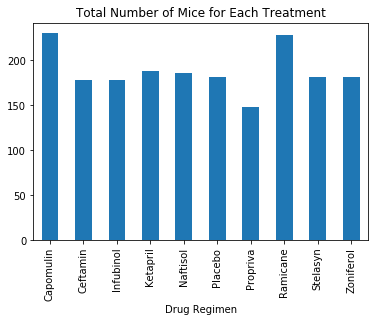

In [354]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
miceptreatment=cleanmice.groupby("Drug Regimen").count().iloc[:,0]
miceptreatment.plot(kind="bar",title="Total Number of Mice for Each Treatment")

([<matplotlib.axis.XTick at 0x1a2065124e0>,
 <a list of 10 Text xticklabel objects>)

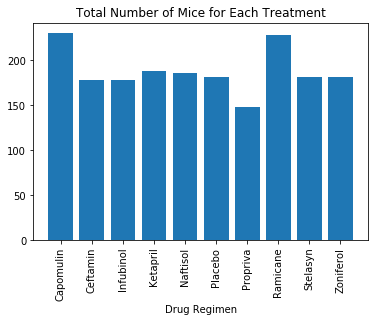

In [355]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Drug_Regimen=summarytv.reset_index().iloc[:,0]
x_axis=np.arange(len(Drug_Regimen))
plt.title("Total Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.bar(x_axis,miceptreatment)
plt.xticks(x_axis,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation='vertical')

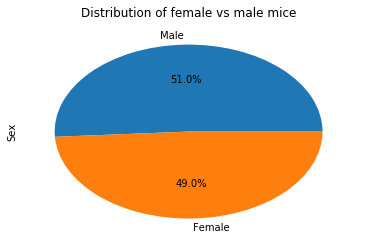

In [356]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderpie=cleanmice["Sex"].value_counts()
genderpie.plot(kind="pie", title="Distribution of female vs male mice", autopct="%1.1f%%")

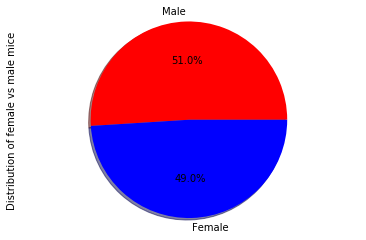

In [357]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
percent = [51, 49]
colors = ["red", "blue"]
plt.pie(percent, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.ylabel("Distribution of female vs male mice")
plt.axis("equal")
plt.show()

In [358]:
#Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mID = cleanmice.groupby("Mouse ID")
# Start by getting the last (greatest) timepoint for each mouse
greatesttp = pd.DataFrame(mID["Timepoint"].max())
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lasttumor = pd.merge(greatesttp, cleanmice, how="left", left_on=["Mouse ID", "Timepoint"], right_on=["Mouse ID", "Timepoint"])
lasttumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


Capomulin
Ramicane
Infubinol
Ceftamin


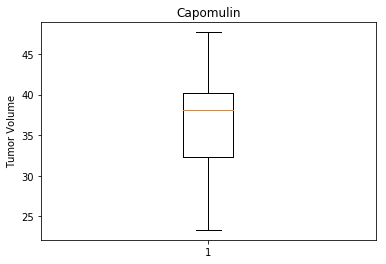

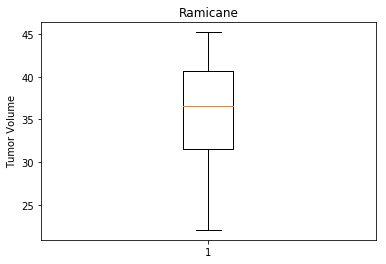

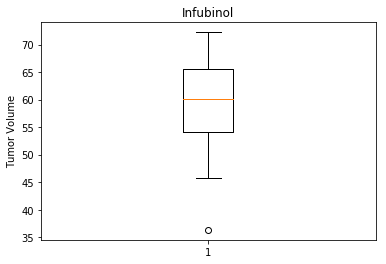

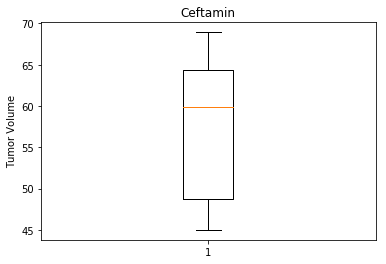

In [359]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drugreg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#volumes_for_drug_regimen=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugreg:
    print(drug)
    mtreat = lasttumor.loc[lasttumor["Drug Regimen"] == drug,["Tumor Volume (mm3)"]]
    volreg = mtreat["Tumor Volume (mm3)"]
    quartiles = volreg.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)  
    # Determine outliers using upper and lower bounds
    fig1, ax1 = plt.subplots()
    ax1.set_title(drug)
    ax1.set_ylabel("Tumor Volume")
    # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    ax1.boxplot(volreg)

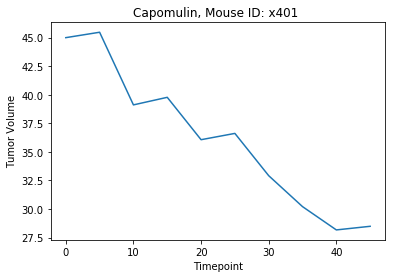

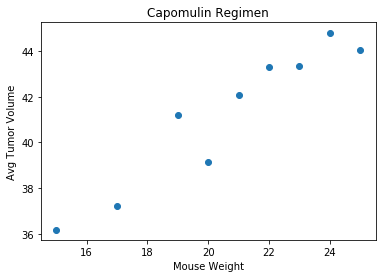

In [360]:
#Line and Scatter Plots
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_trial_1 = cleanmice.loc[cleanmice["Mouse ID"] == 'x401']
mouse_trial_1.head()
x_axis = mouse_trial_1["Timepoint"]
volumes = mouse_trial_1["Tumor Volume (mm3)"]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title(f"Capomulin, Mouse ID: x401 ")
plt.plot(x_axis, volumes)
plt.show()
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = cleanmice[{"Drug Regimen", "Mouse ID", "Weight (g)", "Tumor Volume (mm3)"}]
capomulin = cleanmice.loc[capomulin["Drug Regimen"] == "Capomulin"]
capomuling = capomulin.groupby(["Drug Regimen", "Weight (g)"]).mean()
x_axis = capomuling.index.get_level_values("Weight (g)").values
y_axis = capomuling["Tumor Volume (mm3)"].values
plt.scatter(x_axis, y_axis)
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Volume")
plt.title(f"Capomulin Regimen")
plt.show()

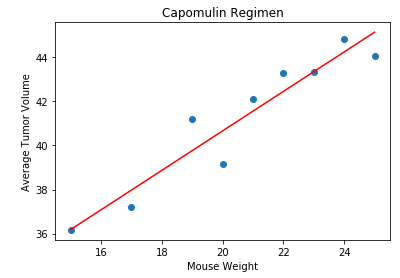

The correlation is 0.95


In [361]:
#Correlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(equation,(6,10))
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title(f"Capomulin Regimen")
plt.show()
print(f"The correlation is {round(correlation[0],2)}")